### Parte 1 - Pre-procesamiento

In [1]:
# Asegurar reproducibilidad

import numpy as np

CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

### Descargamos Corpus Ancora (Cess_esp) del nltk*

In [2]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

### Extraemos las oraciones taggeadas del corpus

In [3]:
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()

### Extraemos los datos de la cantidad de oraciones a ser usadas y un ejemplo de una oracion presente en el corpus

In [4]:
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


### Dividimos en una lista de Oraciones dividida en lista de palabras y cada palabra con un correspondiente tag en una alista diferente

In [5]:
import numpy as np
import pickle

sentences, tagss = [], []
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))
    
#with open("vectors/sentences.txt", "wb") as fp:
 #   pickle.dump(sentences, fp)

#with open("vectors/tags.txt", "wb") as fp:
 #   pickle.dump(tagss, fp)

### Imprimimos una posición de la lista como ejemplo ( Oración y respectivos tags)

In [6]:
print(len(sentences))
print(sentences[6])
print(tags[6])

6030
['La' 'alcaldesa' 'de' 'Málaga' 'y' 'cabeza' 'de' 'lista' 'del' 'PP' 'al'
 'Congreso' 'por' 'esta' 'provincia' ',' 'Celia_Villalobos' ',' 'pidió'
 'hoy' 'a' 'los' 'militantes' 'de' 'esta' 'formación' 'que' '*0*' 'sepan'
 '"' 'administrar' 'la' 'victoria' '"' ',' 'porque' '"' 'no' 'vale' 'la'
 'revancha' ',' 'el' 'insulto' 'o' 'el' 'ataque' ',' 'eso' 'es' 'para'
 'ellos' '"' '.']
dp3cp0


Establecemos los porcentajes del corpus para entrenamiento y evaluación

In [7]:
#!pip3 install --user sklearn
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

#with open("vectors/train_sentences.txt", "wb") as fp:
 #   pickle.dump(train_sentences, fp)

#with open("vectors/eval_sentences.txt", "wb") as fp:
 ##   pickle.dump(tagss, fp)

#with open("vectors/test_sentences.txt", "wb") as fp:
 #   pickle.dump(eval_sentences, fp)

#with open("vectors/train_tags.txt", "wb") as fp:
 #   pickle.dump(train_tags, fp)

#with open("vectors/eval_tags.txt", "wb") as fp:
 #   pickle.dump(eval_tags, fp)

#with open("vectors/test_tags.txt", "wb") as fp:
 #   pickle.dump(test_tags, fp)

Imprimimos los tamaños de las listas que nos indicaran el tamaño de filas de las matrices con las que estaremos trabajando

In [8]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['*' 'El' 'Madrid' 'precisa' 'que' 'el' 'Deportivo' 'gane' 'la' 'Liga' ','
 'porque' 'los' 'gallegos' 'no' 'son' 'considerados' 'unos' 'herederos'
 ',' 'sino' 'unos' 'entrometidos' 'que' 'se' 'supone' 'temporales' ','
 'que' 'pertenecen' 'a' 'la' 'actualidad' 'más' 'rabiosa' 'y' 'no' 'a'
 'la' 'historia' 'más' 'enrabietada' '.']
['El' 'técnico' 'barcelonista' 'ha' 'asegurado' 'que' 'la' 'visita' 'de'
 'Gaspart' 'ha' 'contribuido' 'a' '"' 'sumar' '"' ',' 'y' '*0*' 'ha'
 'argumentado' 'que' 'el' 'encuentro' 'con' 'el' 'presidente' 'significa'
 'que' 'en' 'el' 'Barcelona' '"' 'todos' 'van' 'en' 'la' 'misma'
 'dirección' '"' '.']
['Lo_suyo' ',' 'lo' 'de' 'las' 'ratas' ',' 'no' 'es' 'la' 'carroña' 'pura'
 'y' 'dura' 'sino' 'la' 'vida' 'regalada' ',' 'el' 'eterno' 'banquete'
 'de' 'sobras' 'y' 'residuos' ',' 'el' 'festín' 'organizado' 'a' 'la'
 'sobra' 'de' 'la' 'abundancia' 'y' 'el' 'hartazgo' '.']

tra

Creamos el diccionario sin palabras ni tags repetidos

In [9]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

np.save('word2index.npy', word2index)
np.save('tag2index.npy', tag2index)

24499
291


Transformamos cada uno de los conjuntos de oraciones y tags en vectores numericos, modificando la palabra o tag en un Valor numerico que corresponde a una llave en el diccionario de palabras o tags

In [10]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)

Imprimimos longitud de las matrices

In [11]:
print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:\n")

print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:

[16991, 14639, 22166, 17656, 11711, 14639, 7561, 14821, 19330, 23550, 18387, 12264, 13084, 22836, 6925, 7931, 19306, 17514, 17457, 18387, 14993, 17514, 1400, 11711, 2493, 22309, 4891, 18387, 11711, 1431, 18006, 19330, 1825, 16282, 23377, 7739, 6925, 18006, 19330, 4889, 16282, 8003, 8811]
[17528, 18387, 4136, 19288, 2613, 5391, 18387, 6925, 6920, 19330, 10062, 22227, 7739, 23517, 14993, 19330, 744, 7157, 18387, 14639, 8488, 16708, 19288, 11360, 7739, 17877, 18387, 14639, 1953, 8135, 18006, 19330, 12451, 19288, 19330, 1702, 7739, 14639, 23657, 8811]
[14639, 5597, 24020, 118, 18266, 11711, 19330, 18207, 19288, 17185, 118, 14311, 18006, 13844, 7078, 13844, 18387, 7739, 19709, 118, 7840, 11711, 14639, 22508, 12225, 14639, 11669, 7659, 11711, 24386, 14639, 556, 13844, 15198, 6768, 24386, 19330, 12267, 16645, 13844, 8811]
[286, 279, 84, 252, 263, 279, 95, 154, 32, 2

**Calculamos cual es la oración que contiene mas palabras**

In [12]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print(MAX_LENGTH)

149


**Normalizamos las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector**

In [13]:
#!pip install --user tensorflow

In [14]:
#!pip3 install --user keras

from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

#np.save('vectors/train_sentences_X.npy', train_sentences_X)
#np.save('vectors/eval_sentences_X.npy', eval_sentences_X)
#np.save('vectors/test_sentences_X.npy', test_sentences_X)
#np.save('vectors/train_tags_y.npy', train_tags_y)
#np.save('vectors/eval_tags_y.npy', eval_tags_y)
#np.save('vectors/test_tags_y.npy', test_tags_y)

Using TensorFlow backend.


[16991 14639 22166 17656 11711 14639  7561 14821 19330 23550 18387 12264
 13084 22836  6925  7931 19306 17514 17457 18387 14993 17514  1400 11711
  2493 22309  4891 18387 11711  1431 18006 19330  1825 16282 23377  7739
  6925 18006 19330  4889 16282  8003  8811     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[17528 18387  4136 19288  2613  5391 18387  6925  6920 19330 10062 22227
  7739 23517 14993 

**Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot**

In [15]:
def to_categoricals(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

In [16]:
from keras.utils import to_categorical

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

###**Desarrollamos una prueba de la categorización de los tags**

In [17]:
cat_train_tags_y = to_categoricals(train_tags_y, len(tag2index))
cat_eval_tags_y  = to_categoricals(eval_tags_y, len(tag2index))
cat_test_tags_y  = to_categoricals(test_tags_y, len(tag2index))

print(cat_train_tags_y[0])
print(len(cat_train_tags_y))
print(len(cat_test_tags_y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
3618
1206


### **Indexamos los vectores de SBWE**

In [19]:
embeddings_index = {}
f = open('drive/My Drive/Colab Notebooks/SBW-vectors-300-min5.txt')
for a, line in enumerate(f):
    if a > 0:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
print(type(embeddings_index))
print(len(word2index))

FileNotFoundError: ignored

####**Emparejamos las 24500 palabras únicas de ancora con las 1000653 de palabras vectorizadas de SBWE para generar la matriz de embedding con las 24500 palabras de dimensión 300 como fue preentrenado el SBWE con word2vec.**

In [20]:
embedding_matrix = np.zeros((len(word2index) + 1, 300))
for t, (word, i) in enumerate(word2index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # las palabras que no se encuentren en el índice de inserción serán todos ceros.
        embedding_matrix[t] = embedding_vector

embedding_matrix.shape

(24500, 300)

#Parte 2 - Entrenamiento

In [21]:
## Funcion que permite forzar el uso de GPU cuando estan presentes

import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



## Estos comandos sirven para activar el modelo distribuido para el uso de las GPUs

In [22]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [23]:
!pip3 install git+https://www.github.com/keras-team/keras-contrib.git


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ll7c83r_
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ll7c83r_
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=11c9a9e6edd30ed7b8d86308fe9d7e47d711a32a9183a5624a0ac985149062a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-08okpykt/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
"""from keras.models import Sequential
from keras.layers import Dense, InputLayer, Embedding, Activation, Bidirectional, LSTM, TimeDistributed, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import plot_model

lr = 0.001
lr_decay = 1e-4

embedding_layer = Embedding(len(word2index)+1, 300, weights=[embedding_matrix],  input_length=MAX_LENGTH, trainable=False)
#embedding_layer = Embedding(len(embeddings_index)+1, 300, weights=[embedding_matrix],  input_length=MAX_LENGTH, trainable=False)

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(embedding_layer)
model.add(Bidirectional(LSTM(300, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

optimizer = Adam(lr=lr, decay=lr_decay)

#parallel_model = multi_gpu_model(model, gpus=2)
#model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
model.summary()"""

In [24]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(MAX_LENGTH,))
word_embedding_size = 300

# Embedding Layer
model = Embedding(input_dim=len(word2index), output_dim=word_embedding_size, input_length=MAX_LENGTH)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(len(tag2index), activation="relu"))(model)  

# CRF Layer
crf = CRF(len(tag2index))

out = crf(model)  # output
model = Model(input, out)


#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 149)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 149, 300)          7349700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 149, 600)          1442400   
_________________________________________________________________
lstm_2 (LSTM)                (None, 149, 600)          2882400   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 149, 291)          174891    
_________________________________________________________________
crf_1 (CRF)                  (None, 149, 291)          170235    
Total params: 12,019,626
Trainable params: 12,019,626
Non-trainable params: 0
_______________________________________________

### Desarrollamos el entrenamiento del modelo, el model.fit es el alimentador de la red, que tiene los ejemplos de entrenamiento y los ejemplos de validación para que funcione el gradiente y la precisión del modelo.

In [28]:
#!sudo pip install h5py
import os
model_hist = model.fit(train_sentences_X, cat_train_tags_y,
                       validation_data=(eval_sentences_X, cat_eval_tags_y),
                       batch_size=128, 
                       epochs=20,
                       validation_split=0.1, verbose=1)

# serialize model to JSON
model_json = model.to_json()
with open("mb.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("drive/My Drive/Colab Notebooks/mb.h5")
print("Saved model to disk")

Train on 3618 samples, validate on 1206 samples
Epoch 1/20
3618/3618 [==============================] - 40s 11ms/step - loss: 0.8407 - crf_viterbi_accuracy: 0.8154 - accuracy: 0.7865 - val_loss: 0.8164 - val_crf_viterbi_accuracy: 0.8169 - val_accuracy: 0.8171
Epoch 2/20
3618/3618 [==============================] - 40s 11ms/step - loss: 0.8092 - crf_viterbi_accuracy: 0.8188 - accuracy: 0.7865 - val_loss: 0.8025 - val_crf_viterbi_accuracy: 0.8185 - val_accuracy: 0.8187
Epoch 3/20
3618/3618 [==============================] - 40s 11ms/step - loss: 0.7976 - crf_viterbi_accuracy: 0.8182 - accuracy: 0.7865 - val_loss: 0.7943 - val_crf_viterbi_accuracy: 0.8192 - val_accuracy: 0.8194
Epoch 4/20
3618/3618 [==============================] - 40s 11ms/step - loss: 0.7893 - crf_viterbi_accuracy: 0.8198 - accuracy: 0.7865 - val_loss: 0.7871 - val_crf_viterbi_accuracy: 0.8194 - val_accuracy: 0.8196
Epoch 5/20
3618/3618 [==============================] - 40s 11ms/step - loss: 0.7811 - crf_viterbi_accur

# Parte 3 - Evaluación del modelo

In [29]:
sess.close()

### Evaluamos el modelo y calculamos el valor de precision con respecto a los datos de prueba

In [30]:
scores = model.evaluate(test_sentences_X, cat_test_tags_y)
print(f"{model.metrics_names[1]}: {scores[1] * 100}") 

1206/1206 [==============================] - 9s 7ms/step
crf_viterbi_accuracy: 96.89156413078308


### Definimos la funcion que nos servira para graficar el comportamiento del modelo en cada epoca del entrenamiento

In [31]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')

### Procedemos a Graficar el comportamiento del Entrenamiento, tanto del conjunto de entrenamiento como el de validación con respecto a la cantidad de epocas

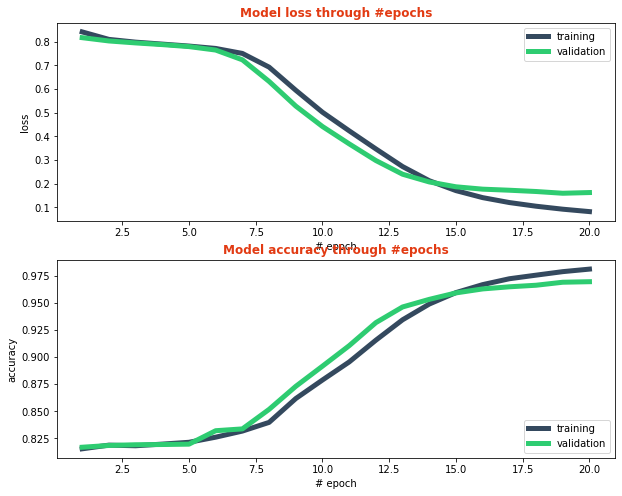

In [32]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('crf_viterbi_accuracy', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_crf_viterbi_accuracy', [])
)

### Función que Permite convertir Indices en Tags

In [36]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

### Hacemos la prediccion sobre el conjunto de pruebas

In [37]:
import pandas as pd
prediction = model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

['da0ms0', 'ncms000', 'aq0cs0', 'vaip3s0', 'vmp00sm', 'cs', 'da0fs0', 'ncfs000', 'sps00', 'np0000l', 'vaip3s0', 'vmp00sm', 'sps00', 'Fe', 'vmn0000', 'Fe', 'Fc', 'cc', 'sn.e-SUJ', 'vaip3s0', 'vmii3s0', 'cs', 'da0ms0', 'ncms000', 'sps00', 'da0ms0', 'ncms000', 'vmip3s0', 'cs', 'sps00', 'da0ms0', 'np0000l', 'Fe', 'di0mp0', 'vmip3p0', 'sps00', 'da0fs0', 'di0fs0', 'ncfs000', 'Fe', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PA

### Hallamos los valores de F1 score, recall, precision

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

# print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



classification_report:
               precision    recall  f1-score   support

         Faa       0.00      0.00      0.00         2
         Fat       0.00      0.00      0.00         5
          Fc       1.00      1.00      1.00      2291
          Fd       0.85      1.00      0.92        87
          Fe       1.00      1.00      1.00       631
          Fg       0.99      1.00      0.99       226
          Fh       0.00      0.00      0.00         3
         Fia       0.00      0.00      0.00         6
         Fit       1.00      0.89      0.94        19
          Fp       1.00      1.00      1.00      1178
         Fpa       0.92      1.00      0.96       156
         Fpt       0.99      1.00      0.99       160
          Fs       1.00      0.31      0.47        13
          Fx       0.87      0.98      0.92        41
          Fz       0.00      0.00      0.00         2
           W       0.78      0.56      0.65       194
           Z       0.51      0.61      0.55       320
  

In [39]:
!pip install seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

print("F1-score: {:.1%}".format(f1_score(results['Expected'], results['Predicted'])))
print("precision-score: {:.1%}".format(precision_score(results['Expected'], results['Predicted'])))
print("recall-score: {:.1%}".format(recall_score(results['Expected'], results['Predicted'])))


  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=4f26e42dfb9d4117fbe07ef3651571add23aeb006f65de2af17d9e22f4eafa77
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval
F1-score: 85.4%
precision-score: 85.5%
recall-score: 85.3%


# Parte 4 - Testing 

**Creamos un pequeño Ejemplo**

In [44]:
test_samples = [
    
    "La visita al zoológico no se cobra y se puede observar la cobra recién adquirida".split()
]
print(test_samples)

[['La', 'visita', 'al', 'zoológico', 'no', 'se', 'cobra', 'y', 'se', 'puede', 'observar', 'la', 'cobra', 'recién', 'adquirida']]


**Creamos la función que usa el modelo para el postagging**

In [45]:
from tabulate import tabulate
#!pip install tabulate
from keras.preprocessing.sequence import pad_sequences
def postagging(test_sample):
  #Convertimos el texto en Una entrada para el Modelo
    test_samples_X = []
    for s in test_samples:
        s_int = []
        for w in s:
           try:
               s_int.append(word2index[w.lower()])
           except KeyError:
              s_int.append(word2index['-OOV-'])
        test_samples_X.append(s_int)

    test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
    #Se Ejecuta la predicion con la Entrada del modelo entrenado
    predictions = model.predict(test_samples_X)
    #Conversion de la Salida del Modelo a un lista de Indices de Tags
    log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
    #Presentación de los Resultados

    salida = ""
    for i in range(len(test_samples)):
        head = test_samples[i]
        body = [log_tokens[i][:len(test_samples[i])]]
        salida += tabulate(body, headers=head)
        salida += "\n"
        
    return salida

## postagging Freeling 4.1

## El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
## DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

## El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
## da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp


**Probamos la función**

In [46]:
print(postagging(test_samples))

La      visita    al     zoológico    no    se        cobra    y    se        puede    observar    la      cobra    recién    adquirida
------  --------  -----  -----------  ----  --------  -------  ---  --------  -------  ----------  ------  -------  --------  -----------
da0fs0  ncfs000   spcms  ao0ms0       rn    p0300000  vmis3p0  cc   p0000000  vmip3s0  vmn0000     da0fs0  np0000a  rg        W



### **Cargamos el modelo**

In [43]:
# load weights into new model
model.load_weights("drive/My Drive/Colab Notebooks/mb.h5")
print("Loaded model from disk")


Loaded model from disk


# **Interfaz**

In [ ]:
from tkinter import *
import tkinter as tk
from tkinter.ttk import *
import sentencepiece as spm

raiz = Tk()

raiz.configure(background='white')

raiz.title("Proyecto PLN")

raiz.geometry('1000x700')
raiz.resizable(0,0)

label= Label( text = 'Tokenizer & Postagging',  background = "white",
            font = "Helvetica 30 bold italic")
label.pack(pady=20)

def tokenize():
        sp_word = spm.SentencePieceProcessor()
        sp_word.load('Models/m_word.model')
        test_sample = entrada.get("1.0",END)
        token= str(sp_word.encode_as_pieces(test_sample))
        salida.configure(state='normal')
        salida.delete(1.0,END)
        salida.insert(INSERT,token)

def postag():
  
    sp_word = spm.SentencePieceProcessor()
    sp_word.load('Models/m_word.model')
    test_sample = entrada.get("1.0",END)
    
    token= sp_word.encode_as_pieces(test_sample)
    listToken=[]
    for i in token:
        listToken.append(i.replace('▁', '', 1))
   
    salidapos = postagging([listToken])
    print(salidapos)
    salida.configure(state='normal')
    salida.delete('1.0', END)
    salida.insert("insert", salidapos)

entrada = Text(raiz,height=14, width=700)
entrada.pack(pady=15)
btn = Button(raiz, text="Tokenizer",command=tokenize)
btn.place(x=440, y=320)
btn1 = Button(raiz, text="Postagging",command=postag)
btn1.place(x=525, y=320)
salida = Text(raiz,height=14, width=700, state='disabled')
salida.pack(pady=25)

raiz.mainloop()